[Text(200.88000000000002, 199.32, 'X[7] <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(133.92000000000002, 163.07999999999998, 'X[0] <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(100.44000000000001, 126.83999999999999, 'X[0] <= 7.24\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(66.96000000000001, 90.6, 'X[4] <= 1.75\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(33.480000000000004, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(100.44000000000001, 54.359999999999985, 'X[2] <= 6.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(66.96000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(167.40000000000003, 126.83999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(267.84000000000003, 163.07

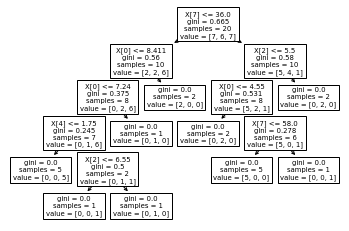

In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz
from sklearn import metrics

#read values from excel
dtrn_pd = pd.read_excel('Data.xlsx', sheet_name='Train',header=0)
dtst_pd = pd.read_excel('Data.xlsx', sheet_name='Test',header=0)


#convert to numpy matrices
dtrn = dtrn_pd.to_numpy()
dtst = dtst_pd.to_numpy()


#Get the trainign and test data and corresponding labels
x_train = dtrn[:,1:-1]
y_train = dtrn[:,-1]
x_test = dtst[:,1:-1]
y_test = dtst[:,-1]

rowtr = x_train.shape[0]
coltr = x_train.shape[1]
rowtst = x_test.shape[0]
coltst = x_test.shape[1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)

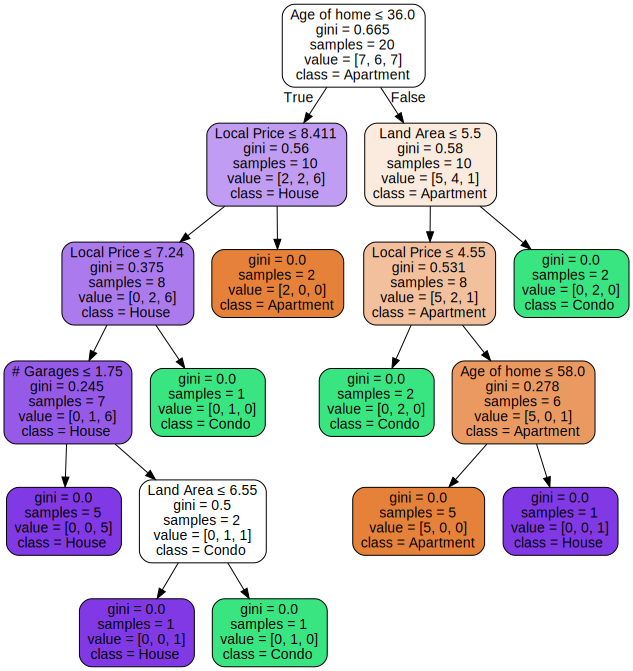

In [3]:
features = dtrn_pd.columns.to_numpy()
features = features[1:9]
classes = clf.classes_   #'Apartment, 'Condo', 'House'

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names=classes,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [4]:
#Test on training data
y_trn_predicted = clf.predict(x_train)

print("Given labels in training data: ", y_train)
print("Predicted labels:          ", y_trn_predicted)

print("Test accuracy (%):",metrics.accuracy_score(y_train, y_trn_predicted)*100)

Given labels in training data:  ['Apartment' 'House' 'Condo' 'Apartment' 'Apartment' 'Condo' 'Condo'
 'House' 'Condo' 'Apartment' 'House' 'House' 'House' 'Condo' 'Apartment'
 'House' 'Apartment' 'House' 'Condo' 'Apartment']
Predicted labels:           ['Apartment' 'House' 'Condo' 'Apartment' 'Apartment' 'Condo' 'Condo'
 'House' 'Condo' 'Apartment' 'House' 'House' 'House' 'Condo' 'Apartment'
 'House' 'Apartment' 'House' 'Condo' 'Apartment']
Test accuracy (%): 100.0


In [5]:
#Test on test data
y_test_predicted = clf.predict(x_test)

print("Given labels in test data: ", y_test)
print("Predicted labels:          ", y_test_predicted)

print("Test accuracy (%):",metrics.accuracy_score(y_test, y_test_predicted)*100)


Given labels in test data:  ['Apartment' 'House' 'House' 'Apartment' 'Apartment']
Predicted labels:           ['Condo' 'Condo' 'Condo' 'Apartment' 'Apartment']
Test accuracy (%): 40.0


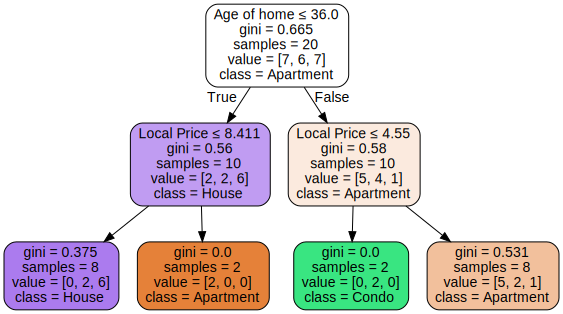

In [6]:
#Limit the depth
clf_limited_depth = tree.DecisionTreeClassifier(max_depth = 2)
clf_limited_depth = clf_limited_depth.fit(x_train, y_train)
dot_data_limited_depth = tree.export_graphviz(clf_limited_depth, out_file=None, feature_names=features, class_names=classes,  filled=True, rounded=True,  special_characters=True)  
graph_limited_depth = graphviz.Source(dot_data_limited_depth)  
graph_limited_depth


In [7]:
#Test on training data
y_trn_predicted = clf_limited_depth.predict(x_train)

print("Given labels in training data: ", y_train)
print("Predicted labels:          ", y_trn_predicted)

print("Test accuracy (%):",metrics.accuracy_score(y_train, y_trn_predicted)*100)

#Test on test data
y_test_predicted = clf_limited_depth.predict(x_test)

print("Given labels in test data: ", y_test)
print("Predicted labels:          ", y_test_predicted)

print("Test accuracy (%):",metrics.accuracy_score(y_test, y_test_predicted)*100)


Given labels in training data:  ['Apartment' 'House' 'Condo' 'Apartment' 'Apartment' 'Condo' 'Condo'
 'House' 'Condo' 'Apartment' 'House' 'House' 'House' 'Condo' 'Apartment'
 'House' 'Apartment' 'House' 'Condo' 'Apartment']
Predicted labels:           ['Apartment' 'Apartment' 'Condo' 'Apartment' 'Apartment' 'Condo'
 'Apartment' 'House' 'Apartment' 'Apartment' 'House' 'House' 'House'
 'House' 'Apartment' 'House' 'Apartment' 'House' 'House' 'Apartment']
Test accuracy (%): 75.0
Given labels in test data:  ['Apartment' 'House' 'House' 'Apartment' 'Apartment']
Predicted labels:           ['Apartment' 'Apartment' 'House' 'Apartment' 'Apartment']
Test accuracy (%): 80.0
